**IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**READ DATA**

In [ ]:
url = 'https://raw.githubusercontent.com/DyArdh/TA-AVD-Kelompok-7/main/diabetes.csv'
df = pd.read_csv(url)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0.0,33.6,0.627,50,1
1,1,85,66,29,0.0,26.6,0.351,31,0
2,8,183,64,0,0.0,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,0.0,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,0,0.0,30.1,0.349,47,1


FIND MISSING VALUE

In [ ]:
df['BMI'].isna().value_counts()

False    765
True       3
Name: BMI, dtype: int64

**CHANGE TYPE DATA OBJECT TO FLOAT**

In [ ]:
df['BMI'] = pd.to_numeric(df['BMI'],errors = 'coerce')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   767 non-null    float64
 5   BMI                       764 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB
None


**REPLACE NaN DATA WITH MEAN COLUMN**

In [ ]:
df['BMI'].fillna((df['BMI'].mean()), inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0.0,33.6,0.627,50,1
1,1,85,66,29,0.0,26.6,0.351,31,0
2,8,183,64,0,0.0,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,0.0,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,0,0.0,30.1,0.349,47,1


In [ ]:
df['BMI'].isna().value_counts()

False    768
Name: BMI, dtype: int64

**FIND DUPLICATED DATA**

In [ ]:
dupli = df.duplicated()
dupli

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [ ]:
cek_dupli = dupli.value_counts()
cek_dupli

False    768
dtype: int64

**CORRELATION DATA**

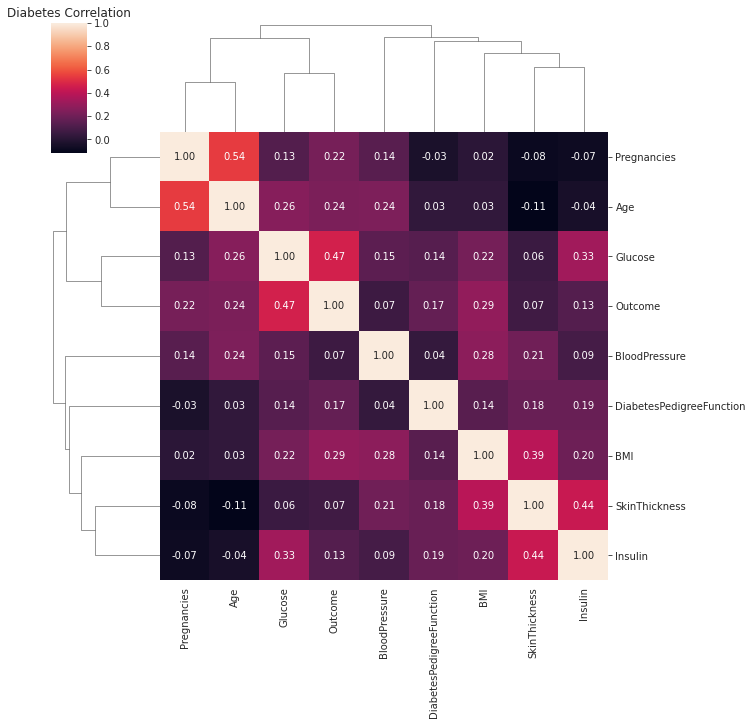

In [104]:
corr_data = df.corr()
sns.clustermap(corr_data,annot= True,fmt = '.2f')
plt.title('Diabetes Correlation')
plt.show();

**DATA VISUALIZATION**

In [ ]:
dbt = df['Outcome']== 1
dbt0 = df['Outcome'] == 0
diabet = df[dbt]
diabet0 = df[dbt0]

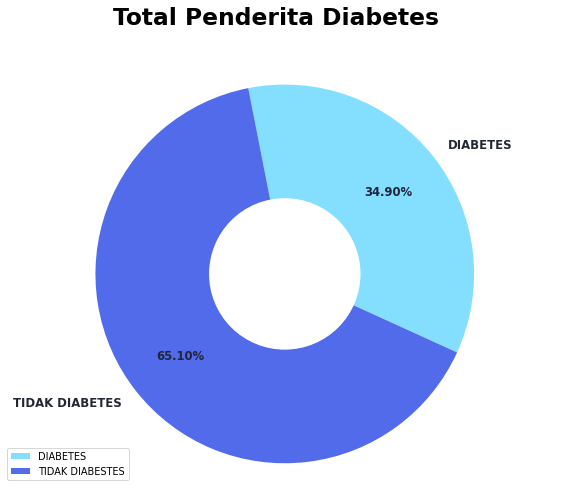

In [ ]:
labels = ['DIABETES', 'TIDAK DIABETES']
sizes = [len(diabet),len(diabet0)]

colors = ['#84DFFF','#516BEB']

# Set Pie chart
fig1, ax1 = plt.subplots(figsize=(10,8), dpi=70)
patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.2f%%', pctdistance=0.70, startangle=-24.5, 
        textprops={
        'fontsize' : 12,
        'fontweight' : 'bold',
        'fontname' : 'DejaVu Sans'})
for text in texts:
    text.set_color('#222831')
for autotext in autotexts:
    autotext.set_color('#21243D')

plt.suptitle("Total Penderita Diabetes",
           fontname='DejaVu Sans', fontsize=24, fontweight = 'bold')

plt.legend(["DIABETES", "TIDAK DIABESTES"], loc= 'upper center', bbox_to_anchor=(0.1, 0.1), frameon=True)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.style.use('seaborn-colorblind')
plt.show()

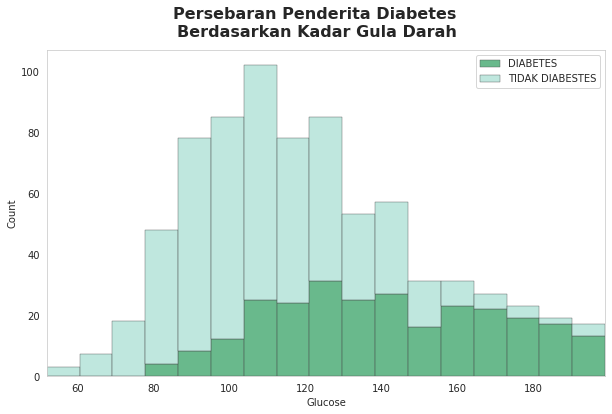

In [113]:
plt.figure(figsize=(10,6))
sns.histplot(
    df,
    x = "Glucose", hue = "Outcome",
    multiple = "stack",
    palette = "BuGn",
    edgecolor = ".3",
    linewidth = .4
)
plt.grid(False)
plt.xlim(52, 199)

plt.suptitle("Persebaran Penderita Diabetes \nBerdasarkan Kadar Gula Darah",
           fontname='DejaVu Sans', fontsize=16, fontweight = 'bold')

plt.legend(["DIABETES", "TIDAK DIABESTES"], loc= 'upper center', bbox_to_anchor=(0.88, 1.0), frameon=True)

Text(0.5, 0.98, 'Persebaran Penderita Diabetes \nBerdasarkan Umur')

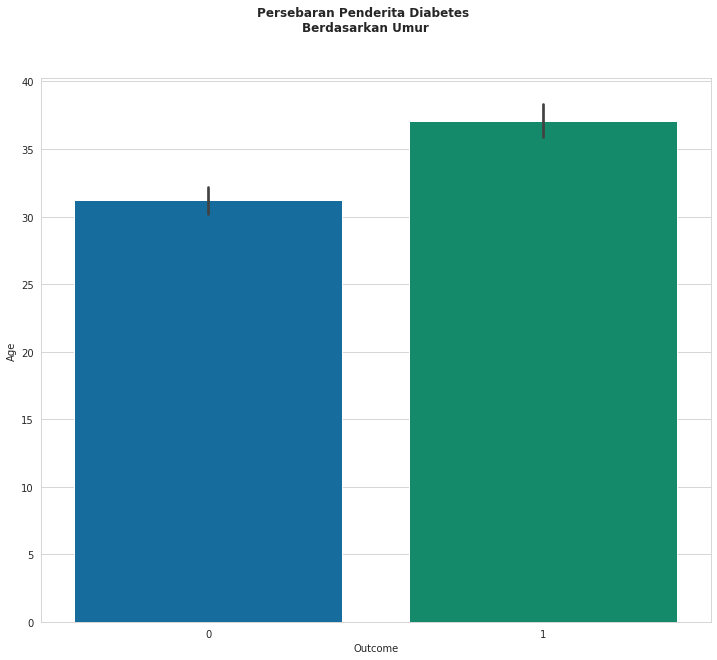

In [128]:
plt.figure(figsize=(12,10))

sns.barplot(x='Outcome', y='Age', data=df)

plt.suptitle("Persebaran Penderita Diabetes \nBerdasarkan Umur",
           fontname='DejaVu Sans', fontsize=12, fontweight = 'bold')

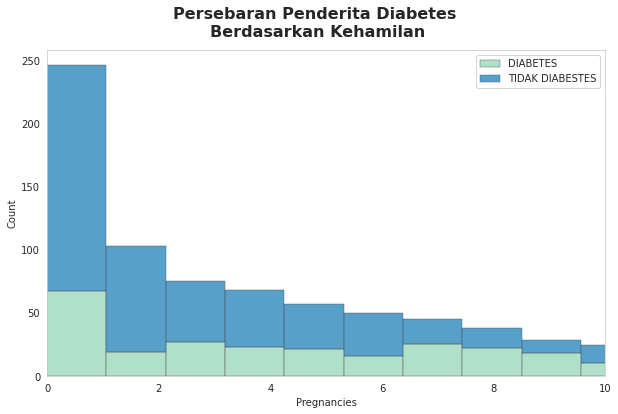

In [109]:
plt.figure(figsize=(10,6))
sns.histplot(
    df,
    x = "Pregnancies",hue = "Outcome",
    multiple = "stack",
    palette = "YlGnBu_r",
    edgecolor = ".3",
    linewidth = .4
)
plt.grid(False)
plt.xlim(0, 10)

plt.suptitle("Persebaran Penderita Diabetes \nBerdasarkan Kehamilan",
           fontname='DejaVu Sans', fontsize=16, fontweight = 'bold')

plt.legend(["DIABETES", "TIDAK DIABESTES"], loc= 'upper center', bbox_to_anchor=(0.88, 1.0), frameon=True)